## **Github Repository link** - [Click Here](https://github.com/ShehanPer/EN3160-Assignment-01-220470K.git)

## Import Libraries 

In [2]:
# Import Libraries

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


## 1. Intensity Transformations

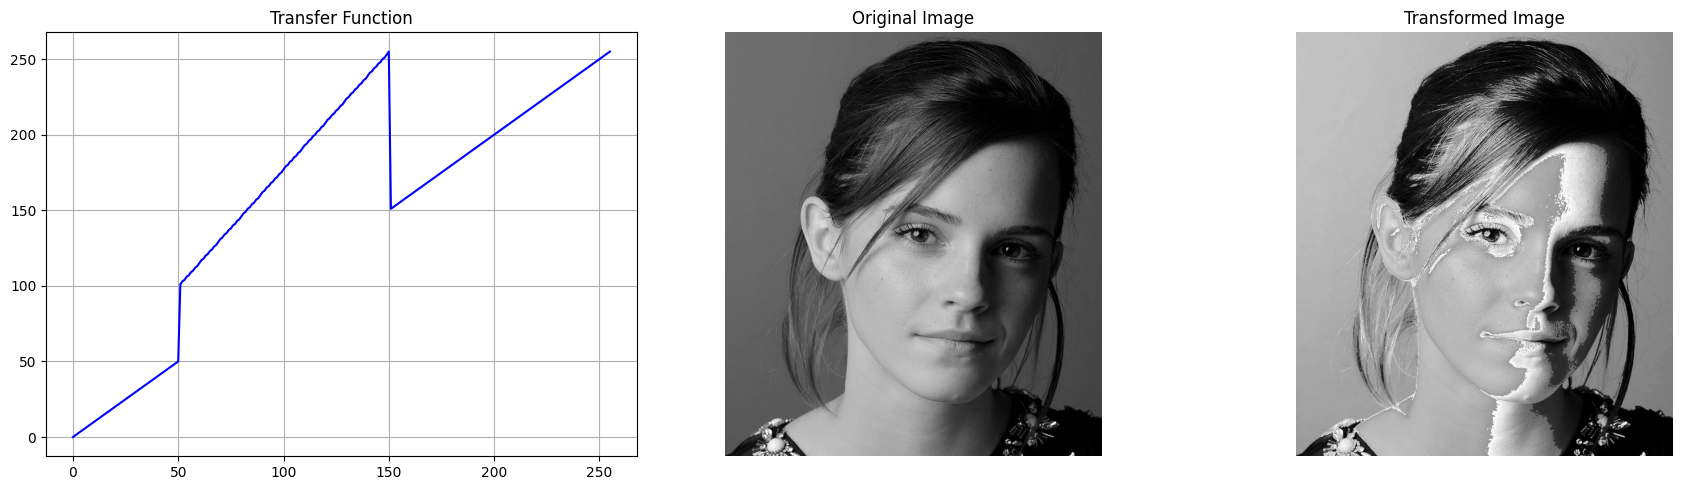

In [24]:
c = np.array([(50,50),(50,100),(150,255),(150,150)])

t1 = np.linspace(0, c[0,1], c[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(c[1,1], c[2,1], c[2,0] + 1 - c[1,0]).astype('uint8')
t3 = np.linspace(c[3,1],255,256-c[3,0]).astype('uint8')

T = np.concatenate((t1,t2[1:]),axis=0).astype('uint8')
T = np.concatenate((T,t3[1:]),axis=0).astype('uint8')

# Read Image
emma_img = cv.imread("a1images/emma.jpg", cv.IMREAD_GRAYSCALE )

# Apply Transfer Function
emma_img_transformed = T[emma_img] # or can use LUT function from OpenCV
#emma_img_transformed = cv.LUT(emma_img, T)


# Plotting the Results

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
# Plot Transfer Function
axs[0].plot(T, color='blue')
axs[0].set_title('Transfer Function')
axs[0].grid(True)

# Show Original Image
axs[1].imshow(emma_img, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Original Image')
axs[1].axis('off')

# Show Transformed Image
axs[2].imshow(emma_img_transformed, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Transformed Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()

## 2. Accentuate white matter and Gray matter

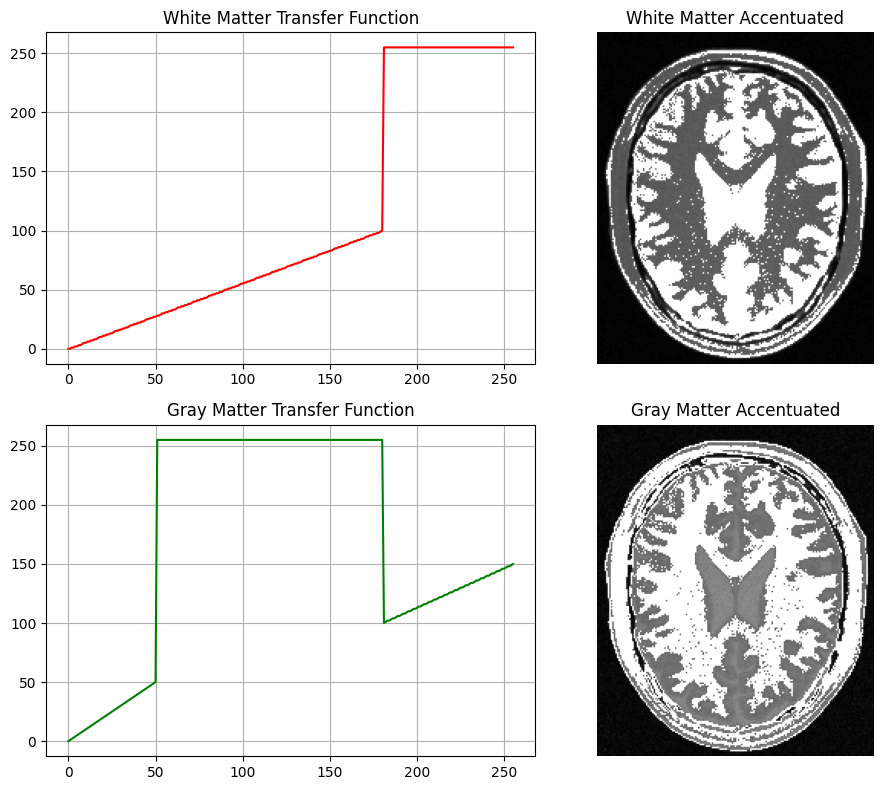

In [132]:
brain_img = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# Define Transfer Functions for White Matter and Gray Matter
W = np.array([(180,100),(180,255)])
G = np.array([(50,50),(50,255),(180,255),(180,100)])

tw_1 = np.linspace(0,W[0,1],W[0,0]+1-0).astype('uint8')
tw_2 = np.linspace(W[1,1],255,256-W[1,0]).astype('uint8')

tg_1 = np.linspace(0,G[0,1],G[0,0]+1-0).astype('uint8')
tg_2 = np.linspace(G[1,1],G[2,1],G[2,0]+1-G[1,0]).astype('uint8')
tg_3 = np.linspace(G[3,1],150,256-G[3,0]).astype('uint8')

# Concatenate the transfer functions
T_w = np.concatenate((tw_1,tw_2[1:]),axis=0).astype('uint8')
T_g = np.concatenate((tg_1,tg_2[1:],tg_3[1:]),axis=0).astype('uint8')

# Apply Transfer Functions
brain_img_white_matter = T_w[brain_img]
brain_img_gray_matter = T_g[brain_img]


#Plot the Results
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot T_w (white matter transfer function)
axs[0,0].plot(T_w, color='red')
axs[0,0].set_title('White Matter Transfer Function')
axs[0,0].grid(True)

# Plot T_g (gray matter transfer function)
axs[1,0].plot(T_g, color='green')
axs[1,0].set_title('Gray Matter Transfer Function')
axs[1,0].grid(True)

# Show white matter accentuated image
axs[0,1].imshow(brain_img_white_matter, cmap='gray', vmin=0, vmax=255)
axs[0,1].set_title('White Matter Accentuated')
axs[0,1].axis('off')

# Show gray matter accentuated image
axs[1,1].imshow(brain_img_gray_matter, cmap='gray', vmin=0, vmax=255)
axs[1,1].set_title('Gray Matter Accentuated')
axs[1,1].axis('off')

plt.tight_layout()
plt.show()




## 3. Gamma Correction and Histrograms

### a) Gamma correction

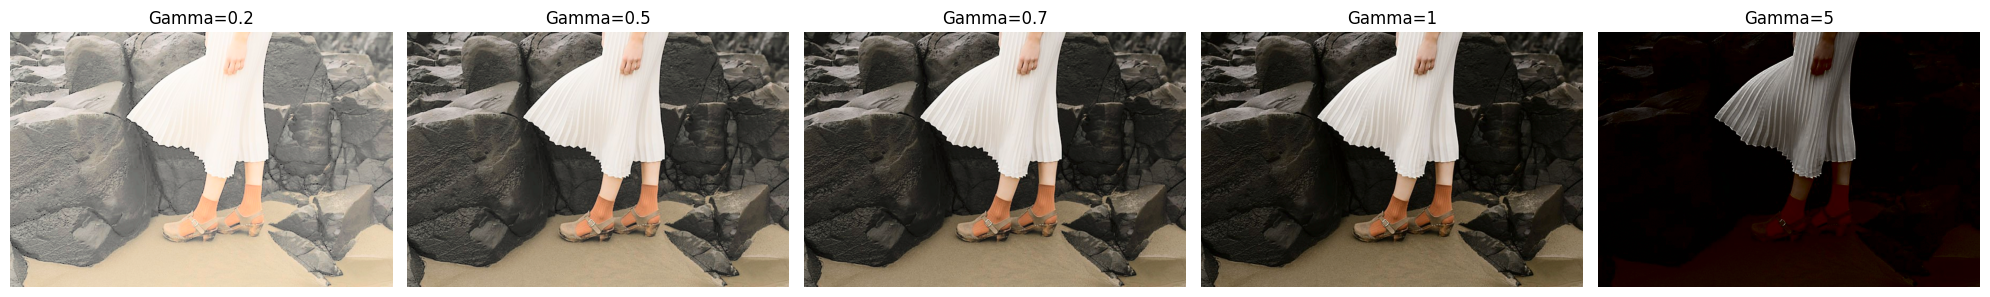

In [71]:
#Read the image for gamma correction
original_img = cv.imread("a1images/highlights_and_shadows.jpg")
img_lab_org = cv.cvtColor(original_img, cv.COLOR_BGR2LAB)

# Plot for different gamma values
gemma_values = [0.2, 0.5, 0.7, 1, 5]

fig, axs = plt.subplots(1, len(gemma_values), figsize=(20, 5))

for i, gamma in enumerate(gemma_values):

    G = np.array([(i/255.0)**(gamma)*255 for i in np.arange(0,256)]).astype('uint8')

    #get copy of the image in LAB color space
    img_lab = img_lab_org.copy()

    # Add gamma correction
    img_lab[:,:,0] = G[img_lab[:,:,0]]

    #convert back to BGR
    img_corr = cv.cvtColor(img_lab, cv.COLOR_LAB2BGR)

    axs[i].imshow(cv.cvtColor(img_corr, cv.COLOR_BGR2RGB))
    axs[i].set_title(f'Gamma={gamma}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()



###  b) Histrograms

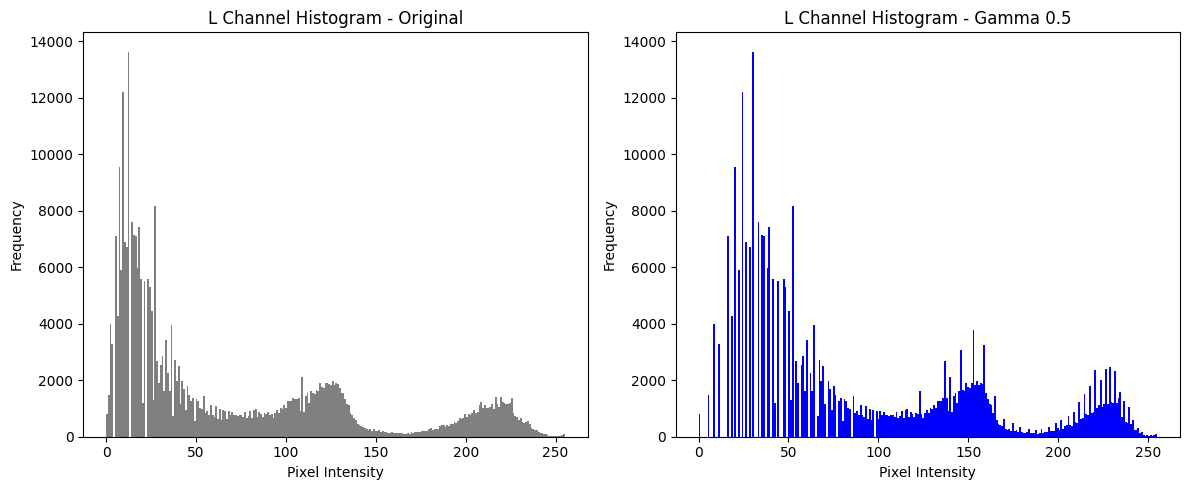

In [30]:

# Read original image
original_img = cv.imread("a1images/highlights_and_shadows.jpg")
img_lab_orig = cv.cvtColor(original_img, cv.COLOR_BGR2LAB)

# Get L channel
L_original = img_lab_orig[:, :, 0]

# Apply gamma correction with gamma = 0.7
gamma = 0.7
G = np.array([((j / 255.0) ** gamma) * 255 for j in np.arange(0, 256)]).astype('uint8')

# Apply gamma correction to a copy
img_lab_gamma = img_lab_orig.copy()
L_gamma_corrected = G[L_original]

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(L_original.ravel(), bins=256, range=(0, 255), color='gray')
plt.title("L Channel Histogram - Original")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")


plt.subplot(1, 2, 2)
plt.hist(L_gamma_corrected.ravel(), bins=256, range=(0, 255), color='blue')
plt.title("L Channel Histogram - Gamma 0.5")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


## 4. Increasing the vibrance of a Photograph

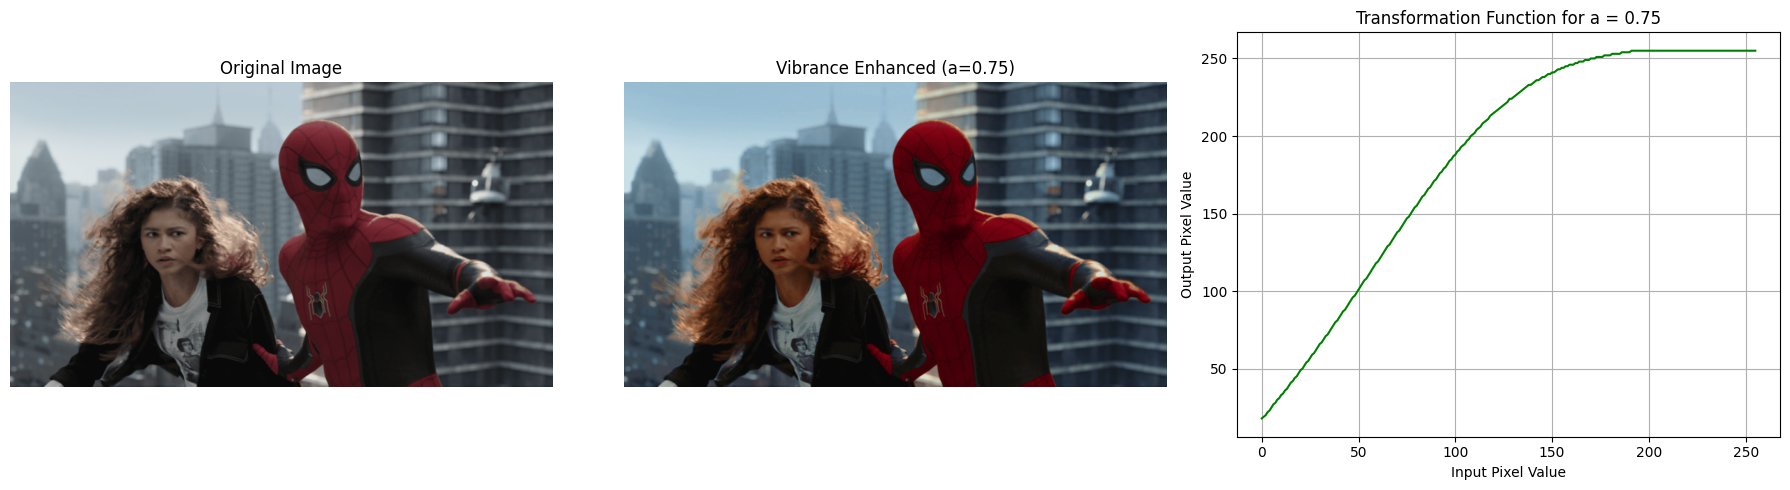

In [29]:
image_pth = "a1images/spider.png"

a = 0.75 # a -> [0, 1]

#Read the image in hsv format
image = cv.imread(image_pth)
image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

#Split to H, S, V
H, S, V = cv.split(image_hsv)

#Transformation function
T = np.array([x + a*128*np.exp(-(x-128)**2/(2*70**2)) for x in range(256)])
F = np.clip(T, 0, 255).astype('uint8')  # Ensure values are within [0, 255]

# Apply transformation to S channel
S_transformed = F[S]

# Merge channels back
image_hsv_transformed = cv.merge((H, S_transformed, V))
# Convert back to BGR
image_bgr_transformed = cv.cvtColor(image_hsv_transformed, cv.COLOR_HSV2BGR)

# Plotting the Results
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
# Show Original Image
axs[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')  

axs[1].imshow(cv.cvtColor(image_bgr_transformed, cv.COLOR_BGR2RGB))
axs[1].set_title(f'Vibrance Enhanced (a={a})')
axs[1].axis('off')

axs[2].plot(F, color='green')
axs[2].set_title(f'Transformation Function for a = {a}')
axs[2].set_xlabel('Input Pixel Value')
axs[2].set_ylabel('Output Pixel Value')
axs[2].grid(True)


plt.tight_layout()
plt.show()



## 5. Histrogram Equalizer

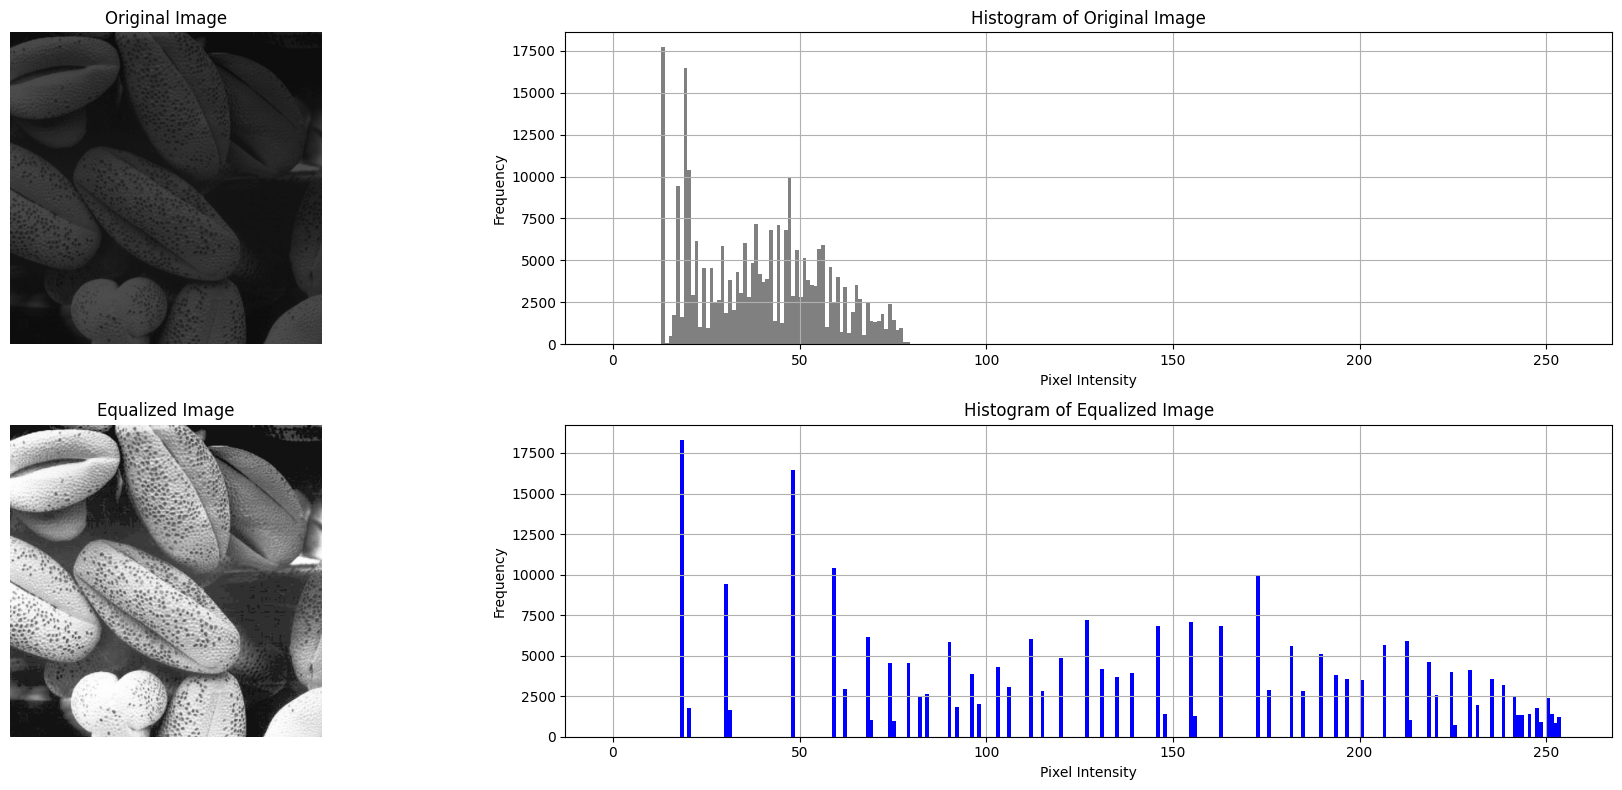

In [137]:
image_PTH = "a1images/shells.tif"
image = cv.imread(image_PTH, cv.IMREAD_GRAYSCALE)

def equalizer(img):

    flatten_img = img.flatten()
    hist = np.bincount(flatten_img, minlength=256)

    # calculate PDF and CDF
    pdf = hist / float(np.sum(hist))
    cdf = np.cumsum(pdf)

    # calculate the equalized cdf and image
    cdf_normalized = (cdf * 255).astype('uint8')
    img_eq = cdf_normalized[flatten_img].reshape(img.shape)

    return img_eq


img_eq = equalizer(image)

# Plotting the Results
fig, axs = plt.subplots(2, 2, figsize=(20, 8))

#original image
axs[0, 0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Equalized image
axs[1, 0].imshow(img_eq, cmap='gray', vmin=0, vmax=255)
axs[1, 0].set_title('Equalized Image')
axs[1, 0].axis('off')

# Histogram of original image
axs[0, 1].hist(image.ravel(), bins=256, range=(0, 255), color='gray')
axs[0, 1].set_title('Histogram of Original Image')
axs[0, 1].set_xlabel('Pixel Intensity')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(True)

# Histogram of equalized image
axs[1, 1].hist(img_eq.ravel(), bins=256, range=(0, 255), color='blue')    
axs[1, 1].set_title('Histogram of Equalized Image')
axs[1, 1].set_xlabel('Pixel Intensity')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()







## 6. Foreground Histogram equalization

### a) Plot H, S, V planes in grayscale

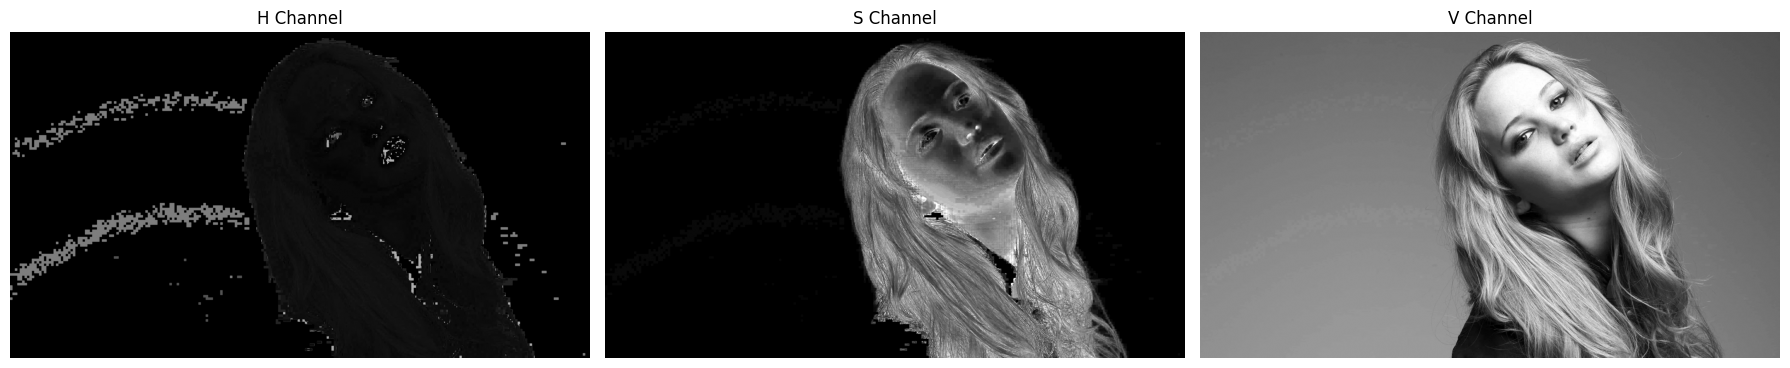

In [140]:
image_pth = "a1images/jeniffer.jpg"

image = cv.imread(image_pth)
image_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

H, S, V = cv.split(image_hsv)

# Plotting H, S, V channels in grayscale
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# H channel
axs[0].imshow(H, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('H Channel')
axs[0].axis('off')

# S channel
axs[1].imshow(S, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('S Channel')
axs[1].axis('off')

# V channel
axs[2].imshow(V, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('V Channel')
axs[2].axis('off')

plt.tight_layout()
plt.show()

### b) Make  binary mask for foreground
   I selected S plane for masking

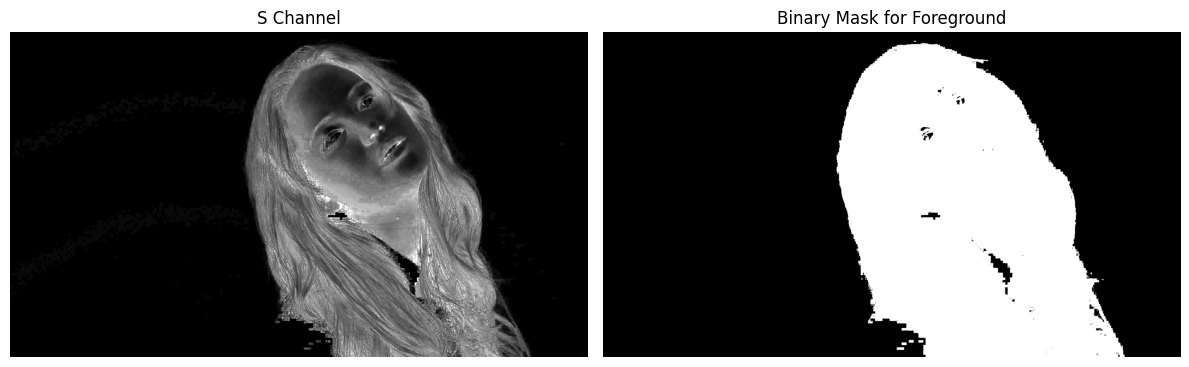

In [161]:
Threashold = 15

# Blank image 
mask_image = np.zeros(image.shape[:2], dtype='uint8')

mask_image[S > Threashold] = 1

# Plotting the Mask and original S channel 
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# S channel
axs[0].imshow(S, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('S Channel')
axs[0].axis('off')

# Mask image
axs[1].imshow(mask_image, cmap='gray', vmin=0, vmax=1)
axs[1].set_title('Binary Mask for Foreground')  
axs[1].axis('off')

plt.tight_layout()
plt.show()




### c) - f) Extract foreground and Calculate Histogram.

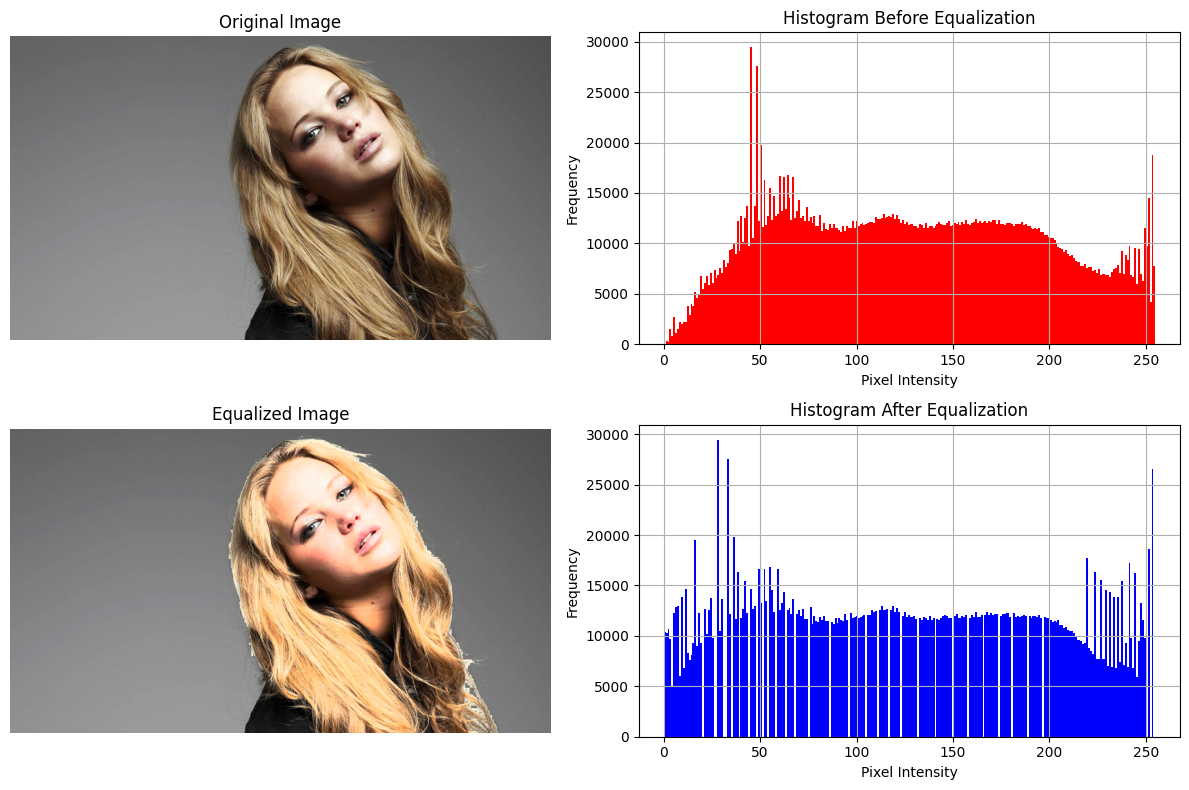

In [159]:
# Parameters
L = 2**3
M, N = image.shape[:2]

Image_plane = V
Image_masked = cv.bitwise_and(Image_plane, Image_plane, mask=mask_image)
Image_foreground = Image_masked[mask_image == 1]

# Calculate Histogram of Foreground
hist_foreground = np.bincount(Image_foreground.ravel(), minlength=256)

# Calculate PDF and CDF
pdf  = hist_foreground / float(np.sum(hist_foreground))
cdf = np.cumsum(pdf)

# Histogram Equalizer
Hist_eq = np.array([cdf[k]*255 for k in range(256)], dtype=np.uint8)

# Apply Histogram Equalization
Image_foreground_eq = Hist_eq[Image_masked]

# Background image 
Image_background = cv.bitwise_and(Image_plane, Image_plane, mask=~mask_image)

# Add foreground  and background 
Image_final = cv.add(Image_foreground_eq, Image_background)

# Convert to RGB for visualization
Image_final_hsv= cv.merge((H, S, Image_final))
Image_final_bgr = cv.cvtColor(Image_final_hsv, cv.COLOR_HSV2BGR)

# Plot as 2×2: each row shows an image and its histogram
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Original Image
axs[0, 0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# Histogram before equalization
axs[0, 1].hist(Image_foreground.ravel(), bins=256, range=(0, 255), color='red')
axs[0, 1].set_title('Histogram Before Equalization')
axs[0, 1].set_xlabel('Pixel Intensity')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(True)

# Equalized Image
axs[1, 0].imshow(cv.cvtColor(Image_final_bgr, cv.COLOR_BGR2RGB))
axs[1, 0].set_title('Equalized Image')
axs[1, 0].axis('off')

# Histogram after equalization
axs[1, 1].hist(Image_foreground_eq[mask_image == 1].ravel(), bins=256, range=(0, 255), color='blue')
axs[1, 1].set_title('Histogram After Equalization')
axs[1, 1].set_xlabel('Pixel Intensity')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

plt.tight_layout()


## 7. Sobel Filter
### a) Using filter2D method

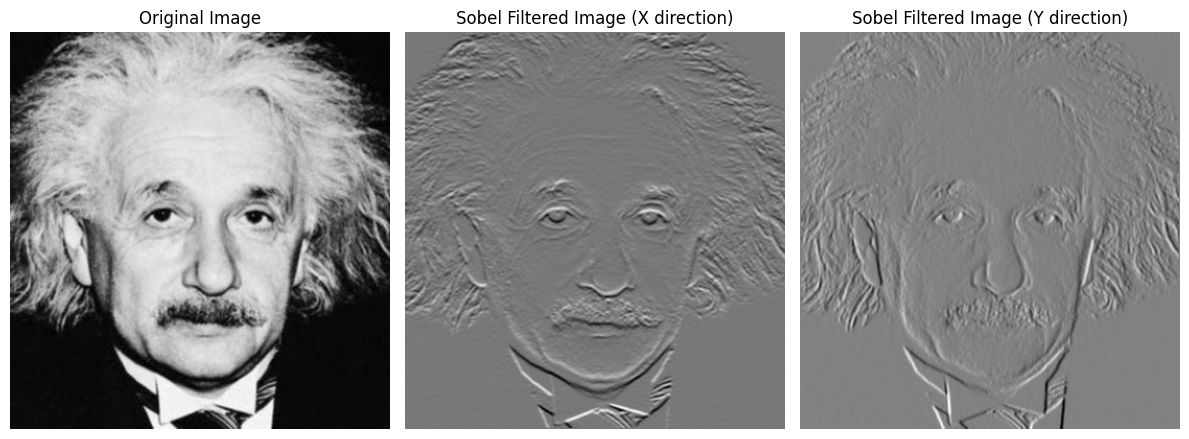

In [173]:
image_pth = "a1images/einstein.png"

Image = cv.imread(image_pth, cv.IMREAD_GRAYSCALE)

# Sobel Filter
Sobel_X = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]], dtype=np.float32)

Sobel_Y = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)



# Using cv2.filter2D to apply the Sobel filter
Sobel_X_image = cv.filter2D(Image, cv.CV_64F, Sobel_X)
Sobel_Y_image = cv.filter2D(Image, cv.CV_64F, Sobel_Y)


# Plotting the Results
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Original Image
axs[0].imshow(Image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Sobel Filtered Image (X direction)
axs[1].imshow(Sobel_X_image, cmap='gray')
axs[1].set_title('Sobel Filtered Image (X direction)')
axs[1].axis('off')

# Sobel Filtered Image (Y direction)
axs[2].imshow(Sobel_Y_image, cmap='gray')
axs[2].set_title('Sobel Filtered Image (Y direction)')
axs[2].axis('off')

plt.tight_layout()
plt.show()

### b) Using another method

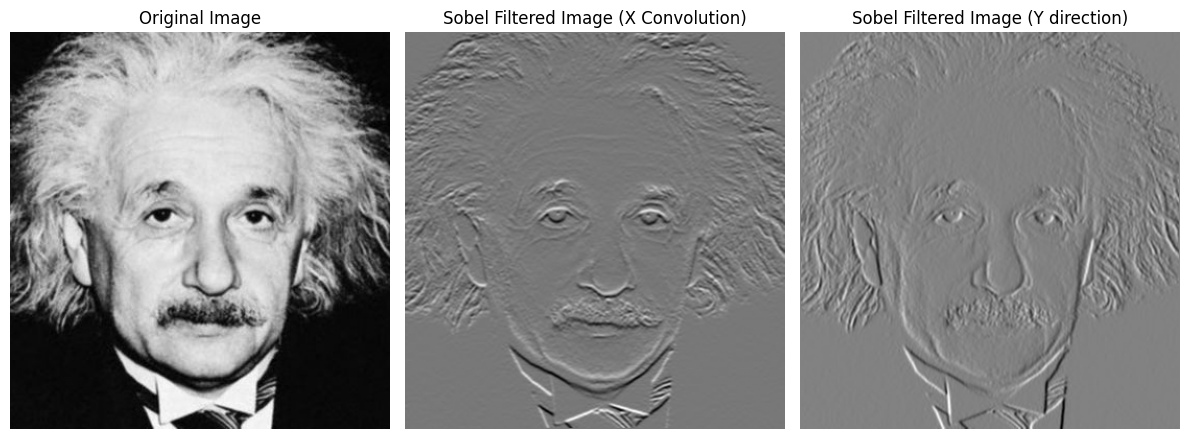

In [ ]:
row, cols = Image.shape

# Blank Image
Sobel_X_image  = np.zeros_like(Image, dtype=np.float32)
Sobel_Y_image  = np.zeros_like(Image, dtype=np.float32)

# Manual convolution
for i in range(1, row-1):
    for j in range (1, cols-1):
        conv_block = Image[i-1:i+2, j-1:j+2]

        Sobel_X_image[i, j] = np.sum(conv_block * Sobel_X)
        
        Sobel_Y_image[i, j] = np.sum(conv_block * Sobel_Y)
        

# Plotting the Results
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Original Image
axs[0].imshow(Image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Sobel Filtered Image (X direction)
axs[1].imshow(Sobel_X_image, cmap='gray')
axs[1].set_title('Sobel Filtered Image (X Convolution)')
axs[1].axis('off')

# Sobel Filtered Image (Y direction)
axs[2].imshow(Sobel_Y_image, cmap='gray')
axs[2].set_title('Sobel Filtered Image (Y direction)')
axs[2].axis('off')


plt.tight_layout()
plt.show()



### c) Using Property

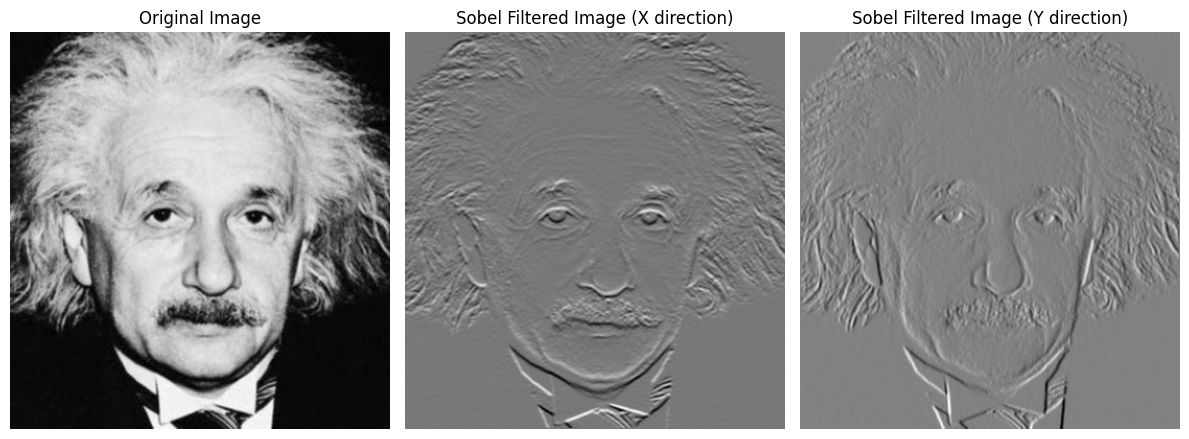

In [175]:
# Sobel Filter Kernels
Sobel_X_horizontal = np.array([[1, 2, 1]], dtype=np.float32)
Sobel_X_vertical= np.array([[1],
                            [0],
                            [-1]], dtype=np.float32)



Sobel_Y_vertical = np.array([[-1, 0, 1]], dtype=np.float32)
Sobel_Y_horizontal = np.array([ [1],
                                [2],
                                [1]], dtype=np.float32)


# Apply Filter2D for Image
Sobel_X_image = cv.filter2D(Image, cv.CV_64F, Sobel_X_horizontal)
Sobel_X_image = cv.filter2D(Sobel_X_image, cv.CV_64F, Sobel_X_vertical)

Sobel_Y_image = cv.filter2D(Image, cv.CV_64F, Sobel_Y_vertical)
Sobel_Y_image = cv.filter2D(Sobel_Y_image, cv.CV_64F, Sobel_Y_horizontal)

# Plotting the Results
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Original Image
axs[0].imshow(Image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Sobel Filtered Image (X direction)
axs[1].imshow(Sobel_X_image, cmap='gray')
axs[1].set_title('Sobel Filtered Image (X direction)')
axs[1].axis('off')

# Sobel Filtered Image (Y direction)
axs[2].imshow(Sobel_Y_image, cmap='gray')
axs[2].set_title('Sobel Filtered Image (Y direction)')
axs[2].axis('off')

plt.tight_layout()
plt.show()



## 8. Zoom Images

In [191]:
# Function for zooming image by nearesr neighbor interpolation and bilinear interpolation
def zoom_image(image, zoom_factor, method='nearest'):
    if method == 'nearest':
        zoomed_image = cv.resize(image, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv.INTER_NEAREST)
    elif method == 'bilinear':
        zoomed_image = cv.resize(image, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv.INTER_LINEAR)

    return zoomed_image

def ssd_error(original_image, Zoomed_image):
    ssd = np.sum((Zoomed_image-original_image) ** 2)

    # normalize the SSD
    ssd = ssd / original_image.size

    return ssd



In [192]:
# Function for plot 
def plot_results(small_image_pth, original_image_pth, zoom_factor):
    small_image = cv.imread(small_image_pth)
    original_image = cv.imread(original_image_pth)

    method = 'nearest'
    zoomed_image_nn = zoom_image(small_image, zoom_factor, method)
    ssd_nn = ssd_error(original_image, zoomed_image_nn)

    method = 'bilinear'
    zoomed_image_bilinear = zoom_image(small_image, zoom_factor, method)
    ssd_bilinear = ssd_error(original_image, zoomed_image_bilinear)

    # Plotting the Results
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # Original Image
    axs[0].imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    # Zoomed Image (Nearest Neighbor)
    axs[1].imshow(cv.cvtColor(zoomed_image_nn, cv.COLOR_BGR2RGB))
    axs[1].set_title(f'Zoomed Image (Nearest Neighbor, Zoom Factor={zoom_factor})\nSSD={ssd_nn:.2f}')
    axs[1].axis('off')

    # Zoomed Image (Bilinear)
    axs[2].imshow(cv.cvtColor(zoomed_image_bilinear, cv.COLOR_BGR2RGB))
    axs[2].set_title(f'Zoomed Image (Bilinear, Zoom Factor={zoom_factor})\nSSD={ssd_bilinear:.2f}')
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()





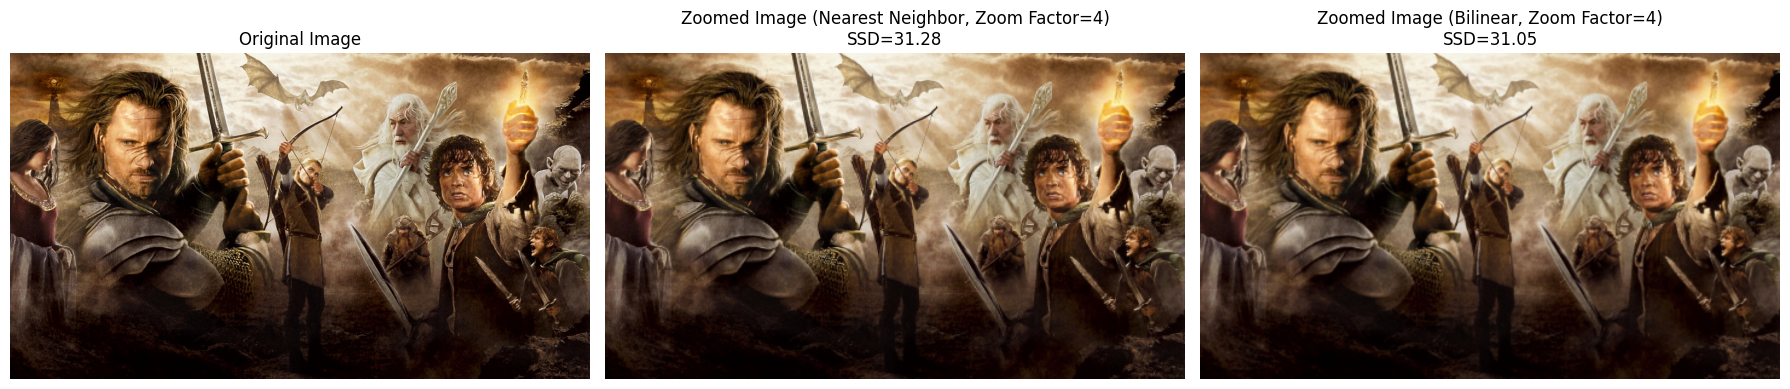

In [193]:
small_image_pth = "a1images/a1q5images/im01small.png"
original_img_pth = "a1images/a1q5images/im01.png" 

plot_results(small_image_pth, original_img_pth, zoom_factor=4)


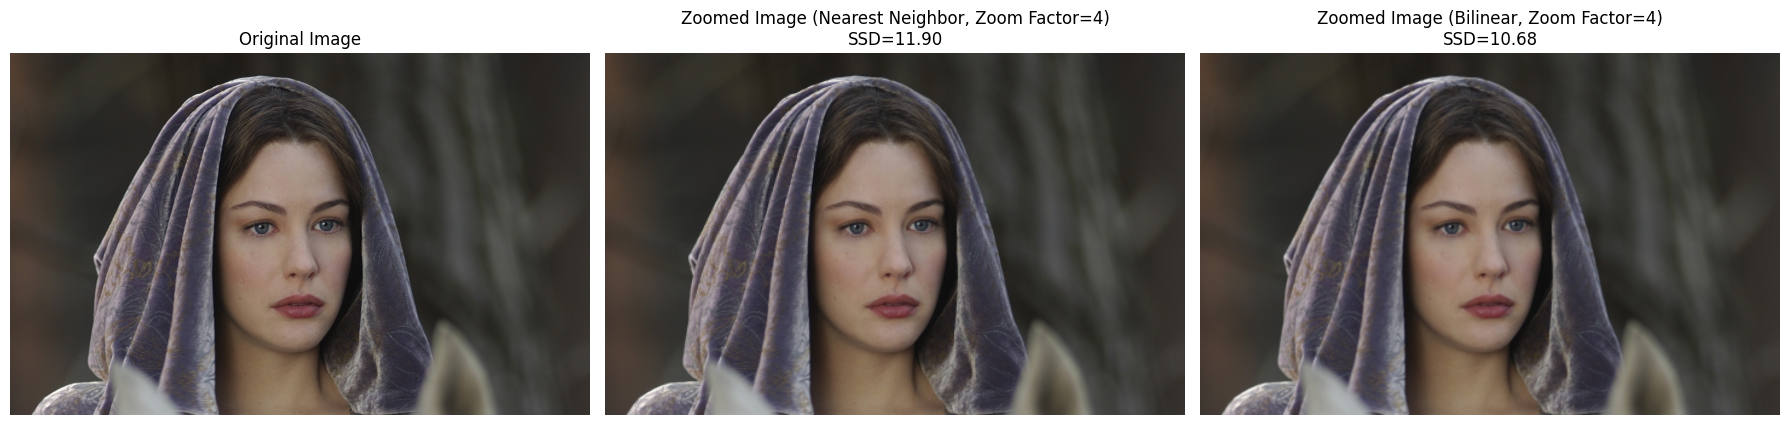

In [194]:
small_image_pth = "a1images/a1q5images/im02small.png"
original_img_pth = "a1images/a1q5images/im02.png"

plot_results(small_image_pth, original_img_pth, zoom_factor=4)

## 9. Segmentation of a Image


In [ ]:
image_pth = "a1images/daisy.jpg"

image = cv.imread(image_pth)
mask_image = np.zeros(image.shape[:2], dtype='uint8')

